# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
import multiprocessing as mp
from torch.distributions import Normal

import torch.nn.functional as F
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline



Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='*filepath_to_env*/Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action

action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print(env_info.agents)

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
[932, 944, 946, 962, 980, 990, 1018, 1032, 1044, 1054, 1086, 1090, 1094, 1106, 1128, 1138, 1170, 1188, 1194, 1208]


In [5]:
env_info=env.reset(train_mode=True)[brain_name]

from PPOAgent2 import PPO_Agent

In [6]:
agent = PPO_Agent(state_size=33, action_size=4, random_seed=20, n_actors=len(env_info.agents))
GAMMA = .99
LAMBDA = .95
Epsilon = 0.1
#Beta = .02
TMAX=1000
MINI_BATCH = 250
BATCH_SIZE  = 1000
iterations=10

Episode 100	Average Score: 0.42	 Score:0.6474999855272472	 Max Score: 2.87   Min Score: 0.0
Episode 200	Average Score: 1.25	 Score:1.707499961834401	 Max Score: 4.41   Min Score: 0.00
Episode 300	Average Score: 1.86	 Score:2.067499953787774	 Max Score: 4.97   Min Score: 0.00
Episode 400	Average Score: 2.84	 Score:3.614499919209629	 Max Score: 8.31   Min Score: 0.00
Episode 500	Average Score: 3.93	 Score:4.467999900132417	 Max Score: 10.1   Min Score: 0.00
Episode 600	Average Score: 5.93	 Score:7.394499834720046	 Max Score: 14.42   Min Score: 0.00
Episode 700	Average Score: 9.43	 Score:13.347499701660126	 Max Score: 29.74   Min Score: 0.0
Episode 800	Average Score: 15.91	 Score:20.675499537866564	 Max Score: 39.42   Min Score: 0.0
Episode 900	Average Score: 30.15	 Score:36.64999918080866	 Max Score: 39.47   Min Score: 0.00

Environment solved in 800 episodes!	Average Score: 30.15


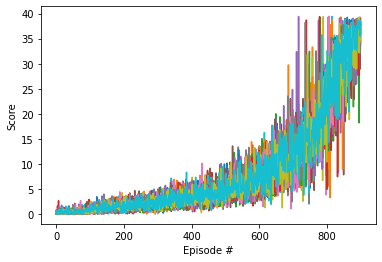

In [7]:
def TrainPPO(eps,tmax,episodes = 10000):
    scores_list = []
    scores_window = deque(maxlen=100) 
    
    for e in range(1,episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        scores = np.zeros(agent.n_actors)
        states = env_info.vector_observations  
        state_list = []
        action_list = []
        probability_list = []
        entropy_list = []
        value_list = []
        reward_list = []
        for t in range(tmax):
            state_list.append(states)
            states = torch.tensor(states, dtype=torch.float)
            dist = agent.policy_net.forward(states)
            actions = dist.sample()
            value = agent.value_target.forward(states)
            value_list.append(value)
            probs = dist.log_prob(actions).sum(dim=1)
            probability_list.append(probs)
            actions = np.clip(actions.cpu().detach().numpy(),-1,1)
            action_list.append(actions)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations  
            rewards = env_info.rewards
            reward_list.append(rewards)
            dones = env_info.local_done
            scores += env_info.rewards
            states = next_states
            
            
            if np.any(dones):
                break
        
        states_t =torch.tensor(state_list,dtype=torch.float)
        value_est = agent.Value_Estimation(reward_list,GAMMA,value_list)
        
        advantages = agent.Advantage_Estimation(value_list,reward_list,GAMMA,LAMBDA,TMAX)
        advantages = advantages.detach().numpy()
        scores_window.append(scores)
        scores_list.append(scores)

        
        for i in range(iterations):
            for _ in range(BATCH_SIZE//MINI_BATCH):
                batch=agent.MakeMinibatch(state_list,value_list[:-1],value_est,\
                                       probability_list,advantages,action_list,TMAX,MINI_BATCH)
          
                agent.Learn(batch.get("states"),batch.get("value_est")\
                            ,batch.get("probs"),batch.get("advs"),batch.get("actions"),Epsilon,MINI_BATCH)
                batch.clear()
            

                            
       
        

        print('\rEpisode {}\tAverage Score: {:.2f}\t Score:{}\t Max Score: {}   Min Score: {}'.format(e, np.mean(scores_window),np.mean(scores),np.round(np.max(scores_list),5),np.min(scores_list)) ,end="")
        if e % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_window)))
            torch.save(agent.policy_net.state_dict(), 'PPOPolicycheckpoint2.pth')
            torch.save(agent.value_target.state_dict(), 'PPOValuecheckpoint2.pth')
            break
        
    
    return scores_list



            
            
                

scores = TrainPPO(Epsilon,TMAX)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
    


In [8]:
env.close()